<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Einführung" data-toc-modified-id="Einführung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Einführung</a></span><ul class="toc-item"><li><span><a href="#Verteilungen-visualieren" data-toc-modified-id="Verteilungen-visualieren-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Verteilungen visualieren</a></span></li><li><span><a href="#Verteilungen-samplen-und-Histogramme-fitten" data-toc-modified-id="Verteilungen-samplen-und-Histogramme-fitten-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Verteilungen samplen und Histogramme fitten</a></span></li></ul></li><li><span><a href="#Verteilungsfunktionen" data-toc-modified-id="Verteilungsfunktionen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Verteilungsfunktionen</a></span><ul class="toc-item"><li><span><a href="#Aufgabe-3a)" data-toc-modified-id="Aufgabe-3a)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Aufgabe 3a)</a></span></li></ul></li><li><span><a href="#Zentraler-Grenzwertsatz" data-toc-modified-id="Zentraler-Grenzwertsatz-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Zentraler Grenzwertsatz</a></span><ul class="toc-item"><li><span><a href="#Aufgabe-3a)" data-toc-modified-id="Aufgabe-3a)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Aufgabe 3a)</a></span></li><li><span><a href="#Aufgabe-3b)" data-toc-modified-id="Aufgabe-3b)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Aufgabe 3b)</a></span></li><li><span><a href="#Zufallsvariablen-erzeugen" data-toc-modified-id="Zufallsvariablen-erzeugen-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Zufallsvariablen erzeugen</a></span></li></ul></li></ul></div>

# Statistische Physik WS 19/20 <a class="tocSkip">
# Aufgabe 3 <a class="tocSkip">

# Einführung

__Notwendige Pakete installieren__

In [ ]:
import Pkg
Pkg.add(["Distributions", "StatsBase", "Plots"])

__und laden__

In [11]:
using StatsBase
using Distributions
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


## Verteilungen visualieren

Das `Distributions`-Paket enhält eine Vielzahl von gebräuchlichen Verteilungen und die Möglichkeit aus diesen zu samplen.

In [12]:
#d = Uniform(0.0, 1.0)
d = Poisson(2)
#d = Normal(2, 1.5)
#d = Cauchy()

Poisson{Float64}(λ=2.0)

Mithilfe des der Funktionen `cdf` bzw. `pdf` können wir uns direkt die entsprechenden Verteilungen bzw. Dichten verschaffen. 

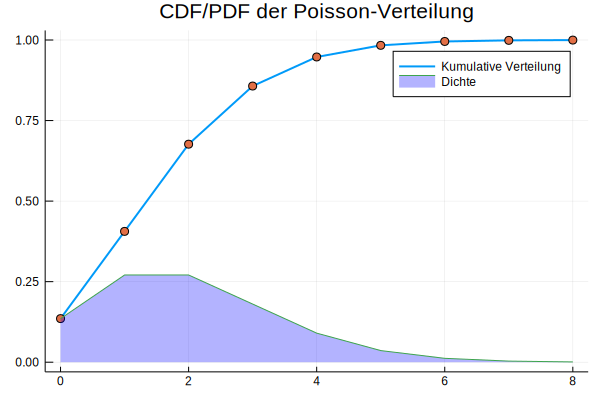

In [28]:
plot(0:8, x->cdf(d,x), lab=["Kumulative Verteilung" ""], lw=2, seriestype=[:line, :scatter])
plot!(0:8, x->pdf(d,x), lab="Dichte", fill=(0, :blue, 0.3))
title!("CDF/PDF der Poisson-Verteilung")

## Verteilungen samplen und Histogramme fitten

Die folgende Codezeile erzeugt 10000 Poisson-verteilte (mit Parameter 1.5) Zufallszahlen

In [30]:
X = rand(d, 10000);

Von diesen Werten können wir ein Histogram erzeugen und plotten.
Man beachte dass wir hier die Bins explizit vorgeben: Der Fit-Algorithmus bestimmt manchmal automatisch Bins mit Breite 1/2, was für eine Verteilung die nur ganzzahlige Werte annimmt nicht sinnvoll ist.

In [31]:
hist = fit(Histogram, X, 0:1:maximum(X)+2, closed=:left)

Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:1:11
weights: [1373, 2670, 2664, 1826, 931, 377, 119, 27, 11, 2, 0]
closed: left
isdensity: false

Um ein Histogram als Dichte plotten zu können, müssen wir die Fläche unter dem Histogram auf 1 normieren.

In [32]:
hist_edges = hist.edges[1]
histX = hist_edges[1:end-1]

histY = hist.weights ./ sum(diff(hist_edges).*hist.weights);

Wir plotten das "experimentell" erzeugte Histogram gegen die exakte Dichte.

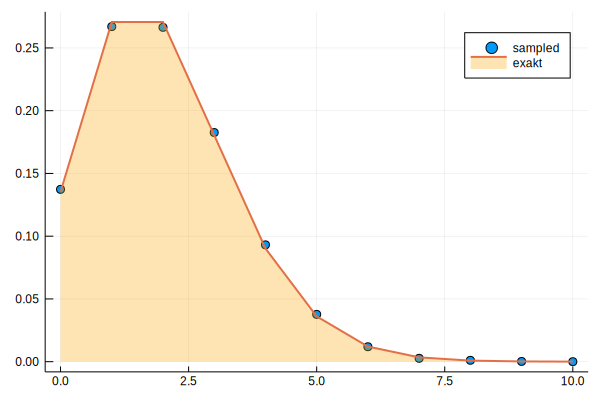

In [33]:
scatter(histX, histY, lab="sampled")
plot!(histX, x->pdf(d, x), lw=2, fill=(0, :orange, 0.3), lab="exakt")

# Verteilungsfunktionen

## Aufgabe 3a)

In [261]:
## Fuegen Sie hier Ihren Code ein





In [262]:
# Loesung



# Zentraler Grenzwertsatz

## Aufgabe 3a)

Fügen Sie hier zu obigem Beispiel analogen Code ein, der eine Normalverteilung mit $\mu=2$, $\sigma=1.5$ sampled, ein Histogram erstellt und dieses zusammen mit der exakten Dichte plottet.

_Hinweis:_ Da die Normalverteilung kontinuierliche Werte annimmt, ist es nicht notwendig die Bins manuell vorzugeben. Bei der Berechnung der Fläche unter dem Histogram müssen Sie aber die Breite der Bins miteinbeziehen.

überlegen Sie außerdem an welche Position innerhalb eines Bins Sie die Werte des Histograms plotten sollten (links, rechts, mittig..)

Es steht Ihnen ausserdem frei die Zahl der Samples und die Zahl der Bins selber anzupassen und ein wenig herumzuprobieren.

In [263]:
# Fuegen Sie hier Ihren Code ein




## Aufgabe 3b)

Damit Sie nicht alle Verteilungsfunktionen von Hand programmieren müssen, dürfen Sie für diesen Aufgabenteil die Funktionen `cdf`,`pdf` und `ecdf` verwenden. `ecdf` erzeugt aus einem Vektor von Werten die _empirische Verteilungsfunktion_.

__Bsp.:__

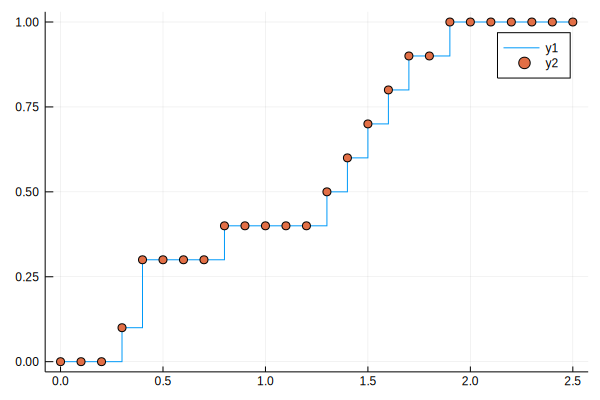

In [203]:
Y = rand(Uniform(0,2), 10);

plot(0:0.1:2.5, x->ecdf(Y)(x), seriestype=[:steps, :scatter])

In [99]:
# Fuegen Sie hier Ihren Code zu Aufgabe 3b) ein.